# Introduccion

Las PDE (Partial Differential Equations) se encuentran en todas partes:

* fisica
    * cinematica
    * dinamica
    * electromagnetismo
    * cuantica
    * elasticidad
    * economia
    * quimica
    * biologia.

99.99999. de las PDE **no se pueden resolver analiciamente**. Para que esto? por que este curso consiste en las soluciones analiticas:

* Por que es bueno saber
* Por que se necesita conocer algunas analiticas para poder probar software
* Un ejercicio matematico intersante
* Por la curiosidad y los retos del ser humano.

Comenzamos por definir las ecuaciones PDE de segundo orden. Son las que usaremos en este curso y las que resuelven la mayoria de los problemas.

Sea $u(x_1, x_2, \cdots, x_n)$ la solucion de la siguiente ecuacion (PDE de desgundo orden)

$$F(x_1, x_2, \cdots, x_n, u_{x_1}, u_{x_2}, \cdots, u_{x_n}, u_{x_{11}},  \cdots, u_{x_{nn}}) $$

$x_i \in \mathbb{R}$, $i=1, \cdots, n$,

$$u_{x_i} = \frac{\partial u}{\partial x_i} $$
$$u_{x_{ij}} = \frac{\partial^2 u}{\partial x_i \partial x_j} $$
$F$ es cualquier funcion analitica ($\sin, \cos, tan, polinimo, \exp$ ,etc



## Motivacion.
El siguiente ejemplo muestra como obtener la ecuacion de onda en una cuerda a partir de las leyes de Newton.


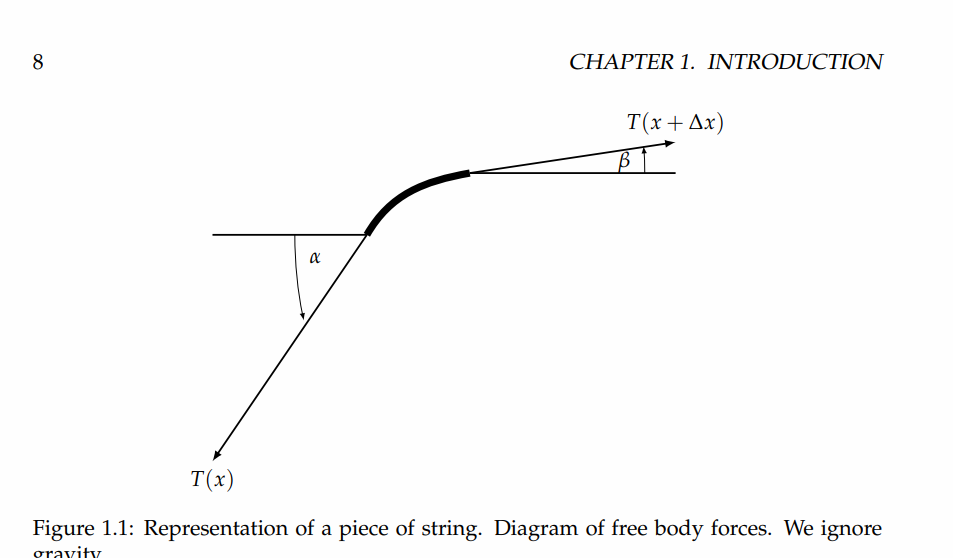

### Dimanica de Newton:

* Fuerzas horitontales se cancelan:
$$T(x) \cos \alpha = T(x + \Delta x) \cos \beta = T \tag{1} $$
* Fuerzas verticales se suman (o restan),

$$-T(x) \sin \alpha + T(x + \Delta x) \sin \beta = m \frac{\partial^2 u}{\partial t^2}(x,t) \tag{2} $$

Aca $u(x,t)$ es desplazamiento vertical de la cuerda.

Definamos la **densidad lineal** como la unidad de masa sobre la unidad de longitud. De forma que $m= \rho \Delta s$ donde $\rho$ es la densidad lineal y $s$ es la longitud de archo.


DE la  ecuacion (1)


$$ T(x) = \frac{T}{\cos \alpha} \quad  y \quad T(x + \alpha)  = \frac{T}{\cos \beta} \tag{3} $$

Tenemos entonces reemplazando la (3) en la (2)

$$ -T \tan \alpha  + T \tan \beta = \rho \Delta s \frac{\partial^2 u}{\partial t^2}u(x,t) \tag{4}$$

Recuerden que

$$\tan \alpha = \frac{\partial u}{\partial x}(x,t) $$
$$\tan \beta = \frac{\partial u}{\partial x}(x+ \Delta x , t) $$
Ademas la longitud de arco.

Dividamos por $\Delta x$ y tambien por $T$ en la ecuacion y reemplazamos las tangentes por derivadas.

$$\frac{ \frac{\partial u}{\partial x}(x+\Delta x, t) - \frac{\partial u}{\partial x}(x,t)}{\Delta x} = \frac{\rho \Delta s}{T \Delta x} \frac{\partial^2 u}{\partial t^2}(x,t)$$

De los dibujos a mano alzada que hicimos
$$ \Delta s = \sqrt{\Delta x^2 + \Delta u^2}$$
Reemplazamos y tomamos el limite cuando $\Delta t \to 0$.
Encontramos

$$\frac{\partial^2 u}{\partial x^2}(x,t) = \frac{\rho}{T} \sqrt{1 + \left ( \frac{\partial u}{\partial x} \right )^2}  \frac{\partial^2 u}{\partial t^2}(x,t)$$

Esta es la ecuacion diferencial parcial de segundo orden que describe como oscila una cuerda en cada punto $x$ . Se puede simplificar mas.

Recuerden el teorema de Taylor

$$\sqrt{1 + \epsilon^2} \approx 1 + \frac12 \epsilon^2 $$


Asumiendo que $\epsilon \ll 1$ (de hecho si pensamos que no hay oscilacion horizontal $\epsilon =0 $ donde $\epsilon=\partial u /\partial x|$
Tenemos la aproximacion

$$\frac{\partial^2 u}{\partial x^2}(x,t) = \frac{\rho}{T}   \frac{\partial^2 u}{\partial t^2}(x,t) \tag{5} $$

Esta es la ecuacion de onda en una dimension espacial.

Como esta hay muchas que no deducimos en este curso. Este curso habla de como solucionarlas no como obenterlas. Se obtienen en cursos de fisica, quimica, econmia, biologia, etc. En el apendice de las notas muestro como se deriva la ecuacion de onda en un volumen (3D).

Se requiere hallar $u(x,t)$. Como tarea dejamos verificar que si $f$ es una funcion doblemente diferenciable en $x,t$ entonces

$$f(x \pm c t) $$ es solucion de la ecuacion de onda (5).

* Cuales son las unidades de $c$?
Asuma longitud $L$, tiempo $T$ y masa $M$.

Existen dos condiciones importantes cuando resolvemos ecucaiones diferenciales.

* **condiciones de frontera (bordo): Las cuerdas pueden ser finitas o infinitas. Si la cuerda es finita, existente en un intervalo $[a,b]$. Las condiciones de bordo sean los valores $u(a,t), u(b,t)$.

* Colndiciones iniciales: Como tenemos la variable tiempo $t$. Las condiciones iniciales son los valores de la funcion en el tiempo inicial $t=t_0$, es decir debemos saber

$$u(t_0, x) $$
en todo valor de $x$.

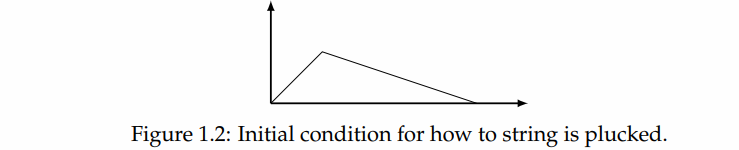

La condicion inicial es una funcion de $x$, es decir tenemos (ver la Figura 1.2) $u(x,t_0)=f(x)$, donde $f(x)$ es la figura representada en la grafica.


Veamos un poco trabajo con Python.

Ejemplo: Verifique que $u(x,y)= \log(x^2 + y^2)$ es una funcion armonica. Es decir, que satisface la ecuacion de Laplace

$$\nabla^2 u(x,y) = \frac{\partial^2 u(x,y)}{\partial x^2} + \frac{\partial^2 u(x,y)}{\partial y^2} = 0$$

Verificacion on Python


In [ ]:
import sympy as sp

# definimos las variables
x,y = sp.symbols('x  y')

# definimos la funcion u(x,y)
u = sp.log(x**2 + y**2)

# vector de segundas derivadas
uu = [ sp.diff(u, var, 2) for var in [x,y]]

# definimos el laplaciano
laplacian_u = sum( uu[i] for i in range(2))

# control de calidad: muestra funcion y el laplaciano
display('funcion u', u)
display('Laplacian of u', laplacian_u)

# simplificamos
display('Laplacian of u', sp.simplify(laplacian_u))


'funcion u'

log(x**2 + y**2)

'Laplacian of u'

2*(-2*x**2/(x**2 + y**2) + 1)/(x**2 + y**2) + 2*(-2*y**2/(x**2 + y**2) + 1)/(x**2 + y**2)

'Laplacian of u'

0

# Capitulo 2: Ecuacion diferenciales parciales de segundo oden (PDE)
En general la ecuacion de prrimer orden PDE es:

$$F(x_1, x_2, \cdots, x_n, u, u_{x_1}, u_{x_2}, \cdots, u_{x_n}) $$
es una ecuacion de primer orden tipo PDE

Ejemplo:
$$\frac{\partial u(x,t)}{\partial x} + \frac{\partial u(x,t)}{\partial t} = 0  $$

A esta ecuacion se le llama **adeveccion** (advection)
Aca identificamos

* $F(x,t,u,u_t, u_x) = u_t + u_x$

El primer metodo para resolver PDEs es el metodo de las caracteristicas:

## Metodo de las caracteristicas
### Historia.

El metodo de las caracteristicas fue introducido por Gaspard Monge (1746-1818) y Augustin-Louis Cauchy (1789-1857), y Joseph Liouvielle (1809-1882). Sin embargo hay autores que dicen otra cosa. Los autores Yehuda Pinchover y Jacob Rubinstein les dan los meritos a William Hamilton, Christian Huygens, Tomas Young,Augustin Fresnel y Pierre de Ferman. No voy a mencionar mas el asunto.

Para introducir el metodo de las caracteristica vamos a usar la ecuacion de adveccion

$$ \frac{\partial u}{\partial x} + \frac{\partial u}{\partial t} = 0 \tag{6} $$

Inicialmente definimos el vector de coeficientes de la ecuacion

$$a = \binom{1}{1}. $$

Con esto podemos escribir la ecuacion (6) como

$$a \cdot \nabla u = 0 $$
Aca $\nabla$ es gradiente

De forma que $a$ es perpendicular al gradiente $\nabla u$ y por lo tanto paralelo a las curvas de nivel definidas como $u(x,t)=constante$. Si $C$ es una curva de nivel el campo a lo largo de esta curva tiene derivada 0

Regla de la cadena

$$\frac{du}{ds} = \frac{\partial u}{\partial x} \frac{dx}{ds} + \frac{\partial u}{\partial t} \frac{dt}{ds} = 0 $$

Entonces si definimos el vector $b$


$$b = \binom{ \frac{dx}{ds} }{ \frac{dt}{ds}} $$
tambien es perpendicular al gradiente.


Los vectores $t,a$ son paralelos de forma ques $t=ka$ o sea

$$ \frac{dx}{ds} = k (1) $$
$$ \frac{dt}{ds} = k (1) $$

La tangente al la curva esta determinada por

$$ t = \left ( \frac{dx}{ds}, \frac{dt}{ds}  \right )  $$
El vector tangente usando longitud de arco $s$ es unitario de forma que
$dx/ds, dt/ds$ no pueden desvancer simultaneamente y para $k \ne 0$


$$dx/dt = (dx/ds)(ds/dt) = (dx/ds)/(dt/ds)  $$
pues $ds/dt = 1/(dt/ds)$
$$\frac{dx}{dt} = \frac{dx/ds}{dt/ds} $$


De aca que

$$\frac{dx}{dt} = \frac{k}{k}= 1 $$
y obtenemos la ecuacion diferencial **ordinaria**

$$\frac{dx}{dt} = 1 $$
Cuya solucion es

$$x = t+ c $$